# Introduction
## Modeling the ODE

We model the Josephson junction using the RCSJ model. The total current running through the
network is 

\begin{eqnarray}
I(t) =& I_s(t) + I_R(t) + I_C(t) \\%
I(t) =& I_c\sin(\phi) + \frac{V}{R} + C \frac{dV}{dt} \\%
V(t) =& \frac{\hbar}{2e}\frac{d\phi}{dt}, \; \frac{dV}{dt} = \frac{\hbar}{2e} \frac{d^2\phi}{dt^2} \\%
\rightarrow I(t) =& I_c\sin(\phi)+\frac{\hbar}{2eR}\frac{d\phi}{dt}+\frac{\hbar C}{2e}\frac{d^2\phi}{dt^2}
\end{eqnarray}

Due to quasiparticle tunnelling, the resistance in reality relies
on both the temperature and the voltage across the junction as described
by this equation:

\begin{eqnarray}
R(V,T)=\begin{cases}
R_{sg}(T)\; & {\rm for\;}|V|\leq2\Delta(T)/e\\
R_{n}\; & {\rm for\;}|V|\geq2\Delta(T)/e
\end{cases}
\end{eqnarray}

where typically $R_{sg}\gg R_{n}$. The characteristic voltage of
the junction is accordingly defined as $V_{c}=I_{c}R_{n}$.

The current-phase relation (CPR) $I_{s}(t)=I_{c}\sin(\phi)$ describes
the supercurrent via a Josephson junction (JJ), where $I_{c}$ is
the critical current and $\phi$ is the junction phase-difference.
The CPR can be stated in more broad terms as 
$
I_{s}(t)=\sum_{\mathrm{n}\geq1}I_{\mathrm{c}_{\mathrm{n}}}\sin(\mathrm{n}\phi)
$
, and when the first harmonic is suppressed (for example, at a 0 --$\pi$
transition), the second harmonic may become
apparent. We try to determine the influence of adding a second harmonic
CPR in the I c H and V H behavior in this thesis by simulation.

Before we try to solve the ODE , we can try to simplify
the ODE by normalising the equation.

This helps in minimizing the round off errors, for instance if one
variable has the value 24582 (units a) the other variable could be
in the order 0.001861(units b). The significance of the second variable
could be irreversibly lost while executing any operation pertinent
to these variables, such as multiplication. One technique to assist
limit these possible losses is to normalise the variables first. The
equation is simplified with normalized time ( unitless ) via the plasma
frequency, $\tau=\omega_{p}t$ where $\omega_{p}=\left(2eI_{c0}/\hbar C\right)^{1/2}$:
$\omega_{p}=\frac{1}{\tau_{p}}=\frac{1}{\sqrt{L_{c}C}}=\sqrt{\frac{2eI_{c}}{\hbar C}}$
and $dt=\frac{1}{\omega_{p}}d\tau\rightarrow\frac{d^{n}}{dt}=\omega_{p}^{n}\frac{d^{n}}{\tau}$,
applying these factors we get

$
\frac{I}{I_{c}}-\sin(\phi)={\frac{\hbar}{2eI_{c}R}\sqrt{\frac{2eI_{c}}{\hbar C}}}\frac{\phi}{\tau}+\frac{\hbar C}{2eI_{c}}\frac{2eI_{c}}{\hbar C}\frac{d^{2}\phi}{d\tau^{2}}
$

$$
\frac{d^{2}\phi}{d\tau^{2}}=\frac{I}{I_{c}}-\sin(\phi)-\frac{1}{Q}\frac{d\phi}{d\tau}
$$

In this eq  Q is the damping factor (or quality
factor) which depends on the inherent resistive and capacitive components
of the RCSJ model. This Q is identical with $\beta_{c}^{1/2}$, where
$\beta_{c}$ is a frequently used damping parameter that was introduced
by Stewart and McCumber. In the case of heavy damping $(Q\ll1)$ we
see the same IV behavior for increasing and decreasing current, however
in the case of under damped junction ($Q\gg1)$, while decreasing
the current, we see that the junction remains in the non zero voltage
range below $I_{c}$. This behavior is also explored in the simulations.

The $I_{c}$in eq , is the critical current and
its dependence with magnetic field is to be incorporated separately
in the simulation based on Eq .

## Simulation parameters

The ODE  can be converted to a system of first order
ordinary differential equations, and then it can be passed on to a
ODE solver like ***scipy.integrate.odeint*** with the initial values.

\[
\begin{array}{ccc}
\mathring{y_{0}}=\frac{d\phi}{d\tau} & \,\,with & y_{0}=\phi\\
\\
\mathring{y_{1}}=\frac{I}{I_{c}}-\sin(\phi)-\frac{y_{0}}{Q} & \,\,with & y_{1}=\mathring{\phi}
\end{array}
\]

The result one such ODE solve is $\phi$ and $\mathring{\phi}$ as
a function of time for the given initial conditions of $\phi$ , $\mathring{\phi}$
and $I$. The dynamics of such a system depend vastly on the initial
condition given to the ODE. 

For the first iteration of the simulation (0 current and 0 phase difference)
starting point for $\phi$ and $\mathring{\phi}$ should be set to
zero as any $\mathring{\phi}$ would have to start from the moment
a superconducting phase sets up and gradually evolves with time to
reach equilibrium. 

After the system evolves for a certain amount of time steps (which
needs to be adjusted depending on Q), the voltage is calculated by
averaging over the last cycle (detected as a percentage of the entire
time solve). If there's no voltage cycle, the voltage gets set to
zero. The initial condition for the next run (next current value in
the IV seep) is the final state of that previous one.

The percentage of final cycle and the number of cycles to be run is
determined for each range of Q (below 0.1, below 1 below 10, below
100) and kept in a function called ***timeparams***.

The entire process is then iterated over the given range of given
currents. It must be noted that since the simulation for current depends
on the previous relaxed values for $\phi$ and $\mathring{\phi}$,
the voltage values for a given I depend on whether the current is
a part of the increasing I cycle or decreasing I cycle. Thus one could
clearly differentiate between the over damped IV and under damped
IV based on the presence of re-trapping current.

# Install dependencies and import lib

In [ ]:
!pip install peakutils > /dev/null
!pip install git+https://github.com/iamashwin99/stlab  > /dev/null


  Running command git clone -q https://github.com/iamashwin99/stlab /tmp/pip-req-build-7wl_epce
  Running command git clone -q https://github.com/steelelab-delft/stlabutils /tmp/pip-install-brdl4w5y/stlabutils_96b617ac192344b788a02de1ec15d5a8


In [ ]:
from scipy.integrate import odeint,solve_ivp
import numpy as np
import scipy.constants as const
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad
import collections


from scipy.signal import argrelextrema
import scipy.integrate as integrate
import scipy.special as special

from scipy.fftpack import fft, fftfreq

import subprocess
from collections import OrderedDict
import plotly.express as px

import stlab


import peakutils
import os

import pickle
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#from numba import jit

# Load function definitions 

In [ ]:


def ensure_dir(file_path):
    '''
    Checks if directory exists. If not, it creates a new one.
    '''
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        print(directory+' does not exist yet. Creating the directory now.')
        os.makedirs(directory)
    else:
        print(directory+' already exists. Continuing')
        
def timeparams(damping):
    '''
    reasonable parameters for time and sampling, tested for 1e-2<damping<1e2
    returns (time,ts)
    '''
    key, val = damping[0], damping[1]
    if val < 0.1:
        times = np.arange(0,8000,0.01)
        ts = 0.8
    elif val < 1.:
        times = np.arange(0,2000,0.01)
        ts = 0.6
    elif val < 10.:
        times = np.arange(0,500,0.01)
        ts = 0.2
    else:
        times = np.arange(0,400,0.01)
        ts = 0.2
    if val<1e-2:
        print('Warning: {}={:E} too low! Calculation might be inaccurate.'.format(key,val))
    if 1e2<val:
        print('Warning: {}={:E} too high! Calculation might take very long.'.format(key,val))
    return (times,ts)


def savedata(data2save,filename,path='../simresults/'):
    np.savetxt(path+filename,data2save)


def savestlab(data2save,filename,path='../simresults/'):
    '''
    data2save = {'Time (wp*t)' : t, 'Phase (rad)' : y[:,0], 'AC Voltage (V)' : y[:,1]}
    '''
    data2save = stlab.stlabdict(data2save)
    prefix = path
    idstring = filename
    myfile = stlab.newfile(prefix,idstring,data2save.keys(),
    usedate=False,usefolder=False)#,mypath='simresults/')
    stlab.savedict(myfile,data2save)
    myfile.close()


def saveivplot(current,voltage,damping,normalized=False,single=False):
    '''
    saves a png of the IVC, with normalized voltage (optional)
    '''
    plt.clf()
    if single:
        if normalized:
            plt.plot(current,voltage/damping[1])
            plt.ylabel(r'$V$ (${}$)'.format(damping[0]))
        else:
            plt.plot(current,voltage)
            plt.ylabel('Voltage ()')
    else:
        if normalized:
            plt.plot(current[:len(current)//2],voltage[:len(current)//2]/damping[1])
            plt.plot(current[len(current)//2:],voltage[len(current)//2:]/damping[1])
            plt.ylabel(r'$V$ (${}$)'.format(damping[0]))
        else:
            plt.plot(current[:len(current)//2],voltage[:len(current)//2])
            plt.plot(current[len(current)//2:],voltage[len(current)//2:])
            plt.ylabel('Voltage ()')
    plt.xlabel(r'Current ($I_c$)')
    path = '../plots/iv/'
    ensure_dir(path)
    plt.savefig(path+'_{}={:08.4f}.png'.format(damping[0],damping[1]))
    plt.close()
    

def saveiv(current,voltage,damping,normalized):
    '''
    saves a .dat file of IVC, with normalized voltage (optional)
    '''
    if normalized:
        voltage = voltage/damping[1]
    data2save = stlab.stlabdict({'Current (Ic)': current, 'Voltage (V)': voltage})
    data2save.addparcolumn('{} ():'.format(damping[0]),damping[1])
    idstring = '{}={:08.4f}'.format(damping[0],damping[1])
    ensure_dir('../simresults/ivcs/')
    df = pd.DataFrame(data2save)
    df.to_csv('../simresults/ivcs/{}.dat'.format(idstring),sep='\t',index=False)#../simresults/ivcs/iv_Q=020.0000.dat
    # myfile = stlab.newfile('../simresults/ivcs/iv',idstring,data2save.keys(), 
    #     usedate=False,usefolder=False)
    # stlab.savedict(myfile,data2save)
    # myfile.close()    
    

def savepickle(data,filepath):
    '''
    saves data to pickle
    '''
    pickle.dump(data, open(filepath,'wb'))
    

def loadpickle(filepath):
    '''
    loads data from pickle
    '''
    return pickle.load(open(filepath,'rb'))


In [ ]:
def Qp(params):
    '''
    returns physical quality factor
    params = {'R':,'Ic':,'C':}
    '''
    R, Ic, C = params['R'], params['Ic'], params['C']
    return R*np.sqrt(2*ec*Ic*C/hbar)

def betac(params):
    '''
    returns Stewart-Mccumber parameter
    '''
    return Qp(params)**2

def omegap(params):
    '''
    returns plasma frequency
    '''
    C, Ic = params['C'], params['Ic']
    return np.sqrt(2*ec*Ic/(hbar*C))

def omegac(params):
    '''
    returns characteristic frequency
    '''
    Rn, Ic = params['Rn'], params['Ic']
    return 2*ec*Ic*Rn/hbar

#@jit(nopython=True)
def findIc(hk,secondHarmonics):
  '''
  Returns normalised ic vales depending on magentic field and second harmonics
  '''
  ic=1
  if hk:
    k=np.pi * hk  # F(H) = |sin(k) / k| where k = πH / H0."
    ic*=abs(np.sin(k)/k)  # scale based on the hk provided
    if secondHarmonics:
      ic+=abs(np.sin(2*k)/(2*k)) # add second order term
  return abs(ic)

#@jit(nopython=True)    
def rcsj_curr(y, t, i, damping,hk=0,secondHarmonics=False):
    '''
    current biased rcsj model
    damping has to be a tuple of (key,val)
    key = 'beta': returns Gross version
    key = 'Q': returns Tinkham version
    hk is the normalised magentic field
    secondHarmonics flag if set true adds the second harmonics component
    '''
    # y0 = phi, y1 = dphi/dt
    y0, y1 = y
    Ic = findIc(hk,secondHarmonics)
    if damping[0]=='beta':
        beta = damping[1]
        dydt = (y1, (-y1 - np.sin(y0) + i/Ic)/beta)
    elif damping[0]=='Q':
        Q = damping[1]
        dydt = (y1, -y1/Q -np.sin(y0) +i/Ic)
    else:
        raise KeyError('wrong key for ODE provided! Must be either beta or Q.')
    return dydt

def rcsj_volt(y, t, i, Q, R1, R2):
    '''
    voltage biased rcsj model
    '''
    y0, y1 = y
    dydt = [y1, -y1/Q/(1+R2/R1) - np.sin(y0) + i/(1+R2/R1)] # check for errors
    return dydt

def rcsj_iv(current, damping, prefix=[], svpng=False,svvolt=False,saveplot=False,savefile=False,normalized=False,printmessg=True,hk=0,secondHarmonics=False):
    '''
    iv sweep for rcsj model
    - damping: tuple of either 'Q' or 'beta' and respective value
    returns IV curve with options:
    - svpng: save each iteration to png
    - svvolt: save peak detection of voltage to png
    - saveplot: save ivc to .png
    - savefile: save ivc to .dat
    - normalized: returns voltage/Q
    - printmessg: print statusmessage after iteration
    - hk - normalised magnetic field
    '''

    current = current.tolist()      # makes it faster ?
    voltage = []

    t, tsamp = timeparams(damping)
    y0 = (0,0) # always start at zero phase and zero current
    idxstart = int(-tsamp*len(t)) # only sample the last tsamp=1% of evaluated time
    df_res=pd.DataFrame() #create and emtpy df for results
    for k,i in enumerate(current):

        y = odeint(rcsj_curr, y0, t, args=(i,damping,hk,secondHarmonics))
        #y0 = (0,max(y[:,1]))
        y0 = y[-1,:]             # new initial condition based on last iteration

        idx = argrelextrema(y[idxstart:,1], np.greater)

        if len(idx[0])<2:
            mean = 0
            voltage.append(mean)
        else:
            x1, x2 = idx[0][-2], idx[0][-1]
            mean = np.mean([y[x1+idxstart:x2+idxstart,1]])
            voltage.append(mean)

            if svpng:
                path='../plots/voltage/{}={:E}/'.format(damping[0],damping[1])
                ensure_dir(path)
                plt.plot(t[idxstart:],y[idxstart:,1])
                plt.plot([t[x1+idxstart],t[x2+idxstart]],[y[x1+idxstart,1],y[x2+idxstart,1]],'o')
                plt.ylim(0,3*damping[1])
                plt.savefig(path+'i={:2.3f}.png'.format(i))
                plt.close()

        if prefix:
            #timedata = {'Time (wp*t)' : t, 'Phase (rad)' : y[:,0], 'AC Voltage (V)' : y[:,1]}
            #ivdata = {'Current (Ic)': i, 'DC Voltage (V)': mean, 'beta ()': Q}
            #idstring = 'beta={:.2f}'.format(ivdata['beta ()'])
            #savedata((k,len(current)),prefix,idstring,timedata,ivdata)

            data2save = {'Time (wp*t)' : t, 'Phase (rad)' : y[:,0], 'AC Voltage (V)' : y[:,1]}
            data2save = stlab.stlabdict(data2save)
            data2save.addparcolumn('Current (Ic)',i)
            data2save.addparcolumn('DC Voltage (V)',mean)
            data2save.addparcolumn('{} ()'.format(damping[0]),damping[1])
            if k == 0:
                idstring = '{}={:2.2f}'.format(damping[0],damping[1])
                ensure_dir(prefix)


                # myfile = stlab.newfile(prefix,idstring,data2save.keys(),usedate=False,usefolder=False)#,mypath='simresults/')
            # stlab.savedict(myfile,data2save)
            df = pd.DataFrame(data2save)
            df_res = df_res.append(df)
            if k == len(current):
                # myfile.close()
                df.to_csv(prefix+idstring+'.dat',sep='\t',index=False)

        if svvolt:
            path='../plots/sols/{}={:E}/'.format(damping[0],damping[1])
            ensure_dir(path)
            fig, ax = plt.subplots(2,sharex=True)
            ax[0].plot(t,y[:,0])
            ax[1].plot(t,y[:,1])
            ax[0].set_ylabel(r'$\phi$')
            ax[1].set_ylabel(r'd$\phi$/dt')
            ax[1].set_xlabel(r'$\tau=t/\tau_c$')
            fig.subplots_adjust(hspace=0)
            plt.savefig(path+'i={:2.3f}.png'.format(i))
            plt.close()

        if printmessg:
            print('\r Done: {}={:E}, i={:2.3f} hk={}'.format(damping[0],damping[1],i,hk),end='')

    current, voltage = np.asarray(current), np.asarray(voltage)

    if savefile:
        saveiv(current,voltage,damping,normalized)

    if saveplot:
        saveivplot(current,voltage,damping,normalized)

    if normalized:
        voltage = voltage/damping[1]

    return (current, voltage)

In [ ]:
def Rj(V,params):
    Vgap = params['Vgap']
    if V>Vgap:
        return params['Rn']
    elif V<=Vgap:
        return params['Rsg']

def Q(V,params):
    Cj = params['Cj']
    Rin = params['Rin']
    wp = params['wp']
    return Cj*wp/(1/Rj(V,params)+1/Rin)

def Vs(t,params):
    if not hasattr(t,'__len__'):
        t = np.array([t])
    result = []
    for x in t:
        if x <params['taustop']/2:
            result.append(x/(params['taustop']/2)*params['Vn'])
        else:
            result.append(params['Vn'])
    #return params['Vn']
    result = np.ones(len(t))*params['Vn']
    return np.array(result)

def VJJmodel_derivatives(t,z,params):
    # print(z)
    # print(t)
    # print(params)
    f = z[0] #phi
    g = z[1] #phidot
    V = phi0/2/np.pi*g
    fp = g
    gp = Vs(t,params)-(1/Q(V,params)*g+np.sin(f))
    return ([fp,gp])

In [ ]:
hbar, ec = const.hbar, const.e

# IV Simulation

# I V Sweep for varying Q

In [ ]:
currents = np.arange(0.,2.005,0.05) # sweep from 0 to 2 Ic where ic is 1 units
all_currents = np.concatenate([currents[:-1],currents[::-1]])

# dampvals = [20] # Q values to loop through
dampvals = [20,10,5,3,2,1,0.1,0.05]
#dampvals = [1,0.5,0.1]
iv = []
prefix = '../simresults/rcsj_time/' 
iv = [rcsj_iv(all_currents,damping=('Q',dd), saveplot=False,savefile=False,prefix=prefix) for dd in dampvals]


../simresults/rcsj_time already exists. Continuing
 Done: Q=2.000000E+01, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=1.000000E+01, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=5.000000E+00, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=3.000000E+00, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=2.000000E+00, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=1.000000E+00, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=1.000000E-01, i=0.000 hk=0../simresults/rcsj_time already exists. Continuing
 Done: Q=5.000000E-02, i=0.000 hk=0

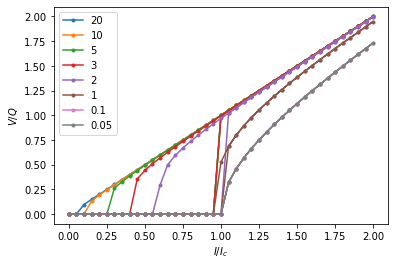

In [ ]:
data=[]
for ivv,dd in zip(iv,dampvals):
  for i in range(len(ivv[0])):
    data.append([ivv[0][i],ivv[1][i]/dd,dd]) #ivv[0] - I vals ivv[1] - V vals

df=pd.DataFrame(data,columns=["I","V","Q"])


[plt.plot(ivv[0],ivv[1]/dd,'.-',label=str(dd)) for ivv,dd in zip(iv,dampvals)]

plt.xlabel(r'$I/I_c$')
plt.ylabel(r'$V/Q$')
plt.legend()
plt.show()
plt.close()

In [ ]:
px.line(df,x="I",y="V",color="Q",labels={"I":"Normalised current I/Ic",
                                         "V":"Normalised Voltage V/Q",
                                         "Q":"Damping factor"} ,markers=True , width = 800 ).show()

# I V H simulation

In [ ]:
harmonics="2nd"
if harmonics == "2nd":
  currents = np.arange(0.,4.005,0.1) # sweep from 0 to 2 Ic where ic is 1 units
else:
  currents = np.arange(0.,2.005,0.05)
#all_currents = np.concatenate([currents[:-1],currents[::-1]])

dampval = 1.5
ks = np.arange(-2,2,0.2)
iv = []
prefix = '../simresults/rcsj_time_h/' 

i=[]
v=[]
h=[]
for kk in ks:
  kk=round(kk,3)
  ivv = rcsj_iv(currents,damping=('Q',dampval), saveplot=False,savefile=False,prefix=prefix,hk=kk,secondHarmonics=harmonics == "2nd")
  for point in range(len(ivv[0])):
    h.append(kk)
    i.append(ivv[0][point])
    v.append(ivv[1][point])



../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-2.0../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-1.8../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-1.6../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-1.4../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-1.2../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-1.0../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-0.8../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-0.6../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-0.4../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-0.2../simresults/rcsj_time_h already exists. Continuing
 Done: Q=1.500000E+00, i=4.000 hk=-0.

In [ ]:
ivhdf = pd.DataFrame( np.column_stack([i,v,h]),columns=["i","v","h"])
fig=px.line(ivhdf,x='i',y='v',color='h',title=f" I V for different values of H with Q={dampval} including {harmonics} harmonics",labels={"i":"Normalised current I/Ic","v":"Normalised Voltage V","h":"Normalised Magentic field"} ,markers=True )

#save px fig to HTML
fig.write_html(f"IVH_Q={dampval}-{harmonics} harmonics-icfixed.html")
fig.show(width=700)

In [ ]:
ivhdf.to_csv(f"IVH_Q={dampval}-{harmonics} harmonics-icfixed.csv")

# VH analysis

In [ ]:
df = pd.read_csv("https://iamashwin99.github.io/thesis-sem2-report/simulations/IVH_Q%3D0.5-1st-icfixed.csv",sep=",",index_col=0)
fname="Q=0.5_1st-harmonics"

In [ ]:
# for every value of H, plot Ic
threshold = 1e-9
hvals = []
icvals=[]
for hh in df.h.unique():

    dfh = df[df.h == hh]
    ic = float(dfh[dfh.v<threshold].tail(1).i)
    if int(hh)==hh:
        ic=0    
    hvals.append(hh)
    icvals.append(ic)

In [ ]:
fig = px.line(x=hvals,y=icvals,title=f"Ic for different values of H for {fname}",markers=True,width=700,labels={"x":"Normalised Magnetic field H","y":"Critical current Ic"})
fig.write_html(fname+'-ich.html')
fig.show()

In [ ]:
ithreshold = 1.8
hvals = []
vvals=[]
for hh in df.h.unique():

    dfh = df[df.h == hh]
    v = float(dfh.v.tail(1))
    # v = float(dfh[dfh.i<ithreshold].tail(1).v)
    if int(hh)==hh:
        continue
           
    hvals.append(hh)
    vvals.append(v)

In [ ]:
px.line(x=hvals,y=[x/120 for x in vvals],title=f"V for different values of H for {fname}" ,markers=True,width=700,log_y=True,labels={"x":"Normalised Magnetic field H","y":"Junction voltage V"})

In [ ]:

ks = np.arange(-2.75,2.75,0.075)
icvals=[]
for kk in ks:
  kk=round(kk,3)
  ic = findIc(kk,False)
  icvals.append(ic)

px.line(x=ks,y=icvals,title="Ic for different values of H",markers=True,width=700)

# Workbench


In [ ]:
import plotly.io as pio
pio.renderers.default = "notebook"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install colab_ssh --upgrade
!pip install -U ipykernel

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password="q")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 * Starting OpenBSD Secure Shell server sshd
   ...done.


2022-05-08T10:23:08Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee. If you intend to use Tunnels in production you should use a pre-created named tunnel by following: https://developers.cloudflare.com/cloudflare-one/connections/connect-apps
2022-05-08T10:23:08Z INF Requesting new quick Tunnel on trycloudflare.com...
2022-05-08T10:23:09Z INF +--------------------------------------------------------------------------------------------+
2022-05-08T10:23:09Z INF |  Your quick Tunnel has been created! Visit it at (it may take some time to be reachable):  |
2022-05-08T10:23:09Z INF |  https://sensitive-benchmark-pixel-bills.trycloudflare.com                                 |
2022-05-08T10:23:09Z INF +--------------------------------------------------------------------------------------------+
2022-05-08T10:23:09Z INF Cannot determine de

In [ ]:
currents = np.arange(0.,2.005,0.05) # sweep from 0 to 2 Ic where ic is 1 units
all_currents = np.concatenate([currents[:-1],currents[::-1]])

dampvals = 20 # Q values to loop through
rcsj_iv(all_currents,damping=('Q',dampvals), saveplot=False,savefile=False,prefix=prefix) 


../simresults/rcsj_time does not exist yet. Creating the directory now.
 Done: Q=2.000000E+01, i=0.000 hk=0

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 1.95, 1.9 , 1.85,
        1.8 , 1.75, 1.7 , 1.65, 1.6 , 1.55, 1.5 , 1.45, 1.4 , 1.35, 1.3 ,
        1.25, 1.2 , 1.15, 1.1 , 1.05, 1.  , 0.95, 0.9 , 0.85, 0.8 , 0.75,
        0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45, 0.4 , 0.35, 0.3 , 0.25, 0.2 ,
        0.15, 0.1 , 0.05, 0.  ]),
 array([ 0.00000000e+00,  5.42854962e-09,  9.29424597e-10,  7.10772398e-09,
         3.97354350e-09,  1.91670766e-09, -5.03988592e-10,  6.56607362e-09,
         7.77818402e-09,  5.20054559e-09,  4.62784387e-09,  2.07795035e-09,
        -1.23218649e-09,  2.25264176e-09,  1.71088704e-08,  1.53931520e-08,
        -2.85240173e-09, -1.15072905e-09,  9.01619298e-09,  2.19966493e-08,
         2.00008321e+01,  2.10000699e+01,  2.20006156e+01,  2.299941

## Evolve phase with time

In [ ]:
Ic = 1e-6
Rsg = 10e3
Rn = Rsg
Cj = 2e-15
L=Cj

Rin = 100e0
Vgap = 4*Ic*Rn/np.pi #Gap voltage linked to IcRn, SIS relation
Vn = 1.1 #0.1*Vgap/Ic/Rin
V0 = Vn*Rin*Ic
# hbar = const.value('h-bar')
phi0 = const.value('mag. flux quantum')
wp = 1/np.sqrt(Cj*phi0/2/np.pi/Ic)

params = {'Vn':Vn, 'Rsg': Rsg, 'Rn':Rn, 'Vgap':Vgap, 'Cj':Cj, 'Rin':Rin, 'wp':wp}
print(Vn)
taustop = 5* wp * Rsg*Cj
params['taustop'] = taustop
print(params)

1.1
{'Vn': 1.1, 'Rsg': 10000.0, 'Rn': 10000.0, 'Vgap': 0.012732395447351628, 'Cj': 2e-15, 'Rin': 100.0, 'wp': 1232585675812.4412, 'taustop': 123.25856758124414}


In [ ]:
ts = np.linspace(0,2*taustop,2000)
# sols = solve_ivp(VJJmodel_derivatives,ts, (0.,0.), args=tuple([params]),tfirst=True ,vectorized=True)
sols = odeint(VJJmodel_derivatives,[0,0],ts, args=tuple([params]),tfirst=True )
solsfunc = interp1d(ts,sols.T)
Vjunc = lambda x: phi0/2/np.pi * wp * solsfunc(x)[1]
# taurep = 2*np.pi/np.average(np.diff(sols[:,0])/np.diff(ts))

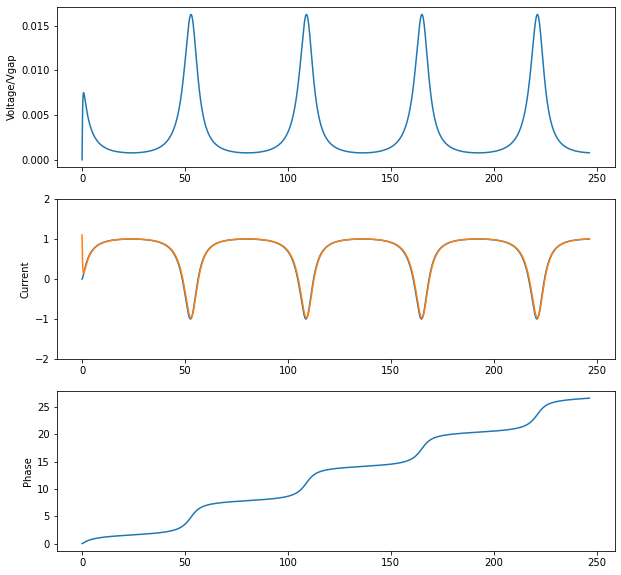

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.clf()
plt.subplot(3, 1, 1)
plt.ylabel('Voltage/Vgap')
plt.plot(ts,Vjunc(ts) / Vgap)
plt.subplot(3, 1, 2)
plt.ylabel('Current')
plt.plot(ts,np.sin(solsfunc(ts)[0]))
plt.plot(ts,(Vs(ts,params)*Ic*Rin-Vjunc(ts))/Rin/Ic)
plt.ylim([-2,2])
plt.subplot(3, 1, 3)
plt.ylabel('Phase')
plt.plot(ts,solsfunc(ts)[0])
plt.show()
plt.close(fig)

In [ ]:


fig = make_subplots(rows=3, cols=1,subplot_titles=("Voltage/Vgap", "Current", "Phase"))

fig.add_trace(
    go.Line(x=ts, y=Vjunc(ts) / Vgap),
    row=1, col=1,
)

fig.add_trace(
    go.Line(x=ts, y=np.sin(solsfunc(ts)[0])),
    row=2, col=1
)

fig.add_trace(
    go.Line(x=(ts), y=(solsfunc(ts)[0])),
    row=3, col=1
)

# Update xaxis properties
fig.update_xaxes(title_text="normalised time", row=1, col=1)
fig.update_xaxes(title_text="normalised time", row=2, col=1)
fig.update_xaxes(title_text="normalised time", row=3, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="Normalised voltage", row=1, col=1)
fig.update_yaxes(title_text="Normalised Current", row=1, col=1)
fig.update_yaxes(title_text="Normalised phase", row=1, col=1)


fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


